# Homework #7

**See Canvas for the HW #7 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

None this time around!

## B. Computational Problems

## Problem B.1: Bootstrap confidence interval for standard deviation

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$ (see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution). Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


*Note: The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But `R` uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$.*

To be sure that you are properly simulating from the right gamma distribution, see the help file for `rgamma()` (meaning, run the line: ?rgamma).


**B.1(a) [10 points] There is a "theory-derived" confidence interval for the standard deviation, which depends on the $\chi^2$ distribution. Research this confidence interval (or find the correct section of the Unit 5 Notes). State why a $\chi^2$ confidence interval is not valid in this context.**

The theory-derived confidence interval for the standard deviation in the gamma distribution relies on the chi-squared distribution, which is valid for pivotal quantities like the sample variance in normal distributions. However, in this, the chi-squared interval is not applicable because the standard deviation of a gamma distribution depends on both shape and rate parameters, making it non-pivotal. For this reason, we use the bootstrap method to compute a valid confidence interval for the population standard deviation.

**B.1(b) [6 points] Simulate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).**

In [1]:
alpha <- 3
beta <- 4

sample_data <- rgamma(8, shape = alpha, rate = 1/beta)
true_sd <- sqrt(alpha / beta^2)

cat("Simulated Sample:", sample_data, "\n")
cat("True Population Standard Deviation:", true_sd, "\n")


Simulated Sample: 17.0663 14.44984 20.2803 12.7832 30.45912 3.318132 16.91489 12.83614 
True Population Standard Deviation: 0.4330127 


**B.1(c) [6 points] Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. To avoid loops, use the `replicate()` function.**

In [4]:
sd_function <- function(data, indices) {
  bootstrap_sample <- data[indices]
  return(sqrt(var(bootstrap_sample)))
}
B <- 200
bootstrap_samples <- replicate(B, boot(sample_data, sd_function, R = B)$t)

cat("Dimension of Bootstrap Samples:", dim(bootstrap_samples), "\n")


Dimension of Bootstrap Samples: 200 1 200 


Each row represents a bootstrap sample, and each column represents the standard deviation calculated from that sample.

**B.1(d) [4 points] Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. To avoid loops, use the `apply()` function. Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.**

Sample Standard Deviation (s): 1.019311 


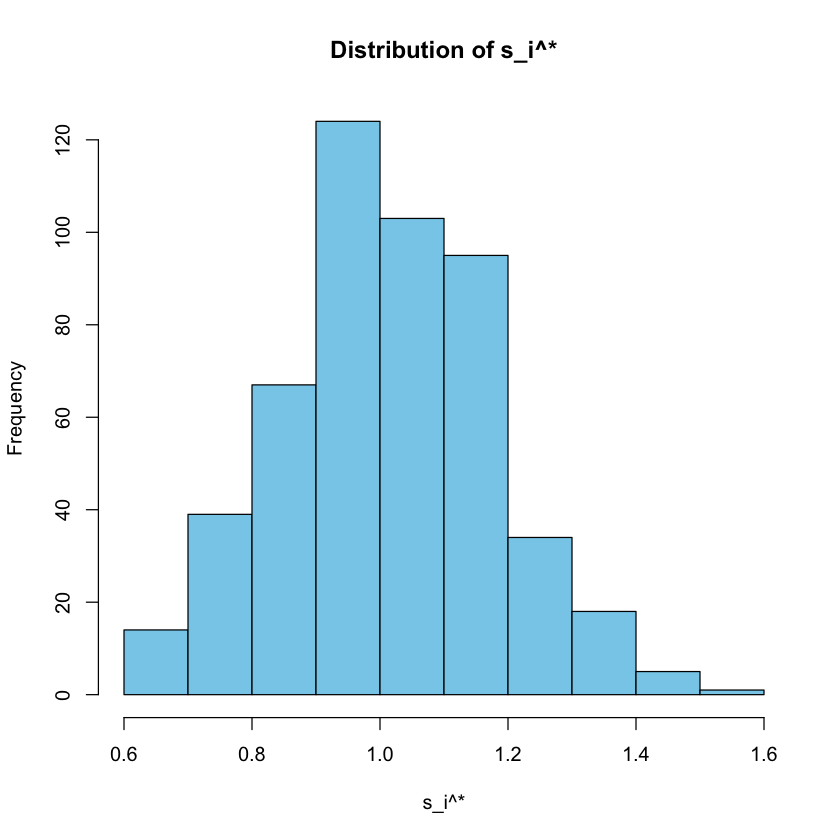

In [16]:
sample_sd <- sd(sample_data)
cat("Sample Standard Deviation (s):", sample_sd, "\n")
bootstrap_sample_sds <- apply(bootstrap_samples, 1, sd)

hist(bootstrap_sample_sds, main = "Distribution of s_i^*", xlab = "s_i^*", col = "skyblue", border = "black")


**B.1(e) [8 points] Use the `quantile()` function to find the $5$th and $95$th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$.**

In [7]:
bootstrap_sd_values <- apply(bootstrap_samples, 1, FUN = function(x) quantile(x, c(0.05, 0.95)))

quantiles_5th <- bootstrap_sd_values[1, ]
quantiles_95th <- bootstrap_sd_values[2, ]
pivot_interval <- c(2 * true_sd - quantiles_95th, 2 * true_sd - quantiles_5th)

percentile_interval <- quantile(bootstrap_sd_values, c(0.05, 0.95))

cat("Bootstrap Pivot Confidence Interval:", pivot_interval, "\n")
cat("Bootstrap Percentile Confidence Interval:", percentile_interval, "\n")


Bootstrap Pivot Confidence Interval: -8.84077 -9.269856 -9.661029 -9.430934 -9.430348 -9.461018 -9.037591 -9.4005 -9.518439 -9.515883 -9.426424 -9.437494 -9.585 -9.585583 -9.511349 -9.570839 -9.171986 -9.512417 -9.323692 -9.279006 -9.45894 -9.567713 -9.516061 -9.572812 -9.515471 -8.976732 -9.278111 -9.560664 -9.496815 -9.608905 -9.555221 -9.430431 -9.228325 -9.433083 -9.515662 -9.166632 -9.573474 -9.523915 -9.515123 -9.401284 -9.078187 -9.52021 -9.592719 -9.522595 -9.496352 -9.05003 -9.418955 -9.300161 -9.170273 -8.882229 -9.042761 -9.588051 -9.462734 -9.457564 -9.301997 -9.582928 -9.567671 -9.462613 -9.397571 -9.509879 -9.614181 -9.401311 -9.539526 -9.299947 -9.166843 -9.498637 -9.454963 -9.42122 -9.097501 -9.59331 -9.571791 -9.589027 -9.437678 -9.428563 -8.88981 -9.566555 -9.158659 -9.617526 -9.243945 -9.50986 -9.429707 -9.576394 -9.57078 -9.432833 -8.893386 -9.587036 -8.533952 -9.258878 -9.513784 -9.608682 -9.537736 -9.513693 -9.531144 -9.456144 -9.036483 -8.45611 -9.515068 -9.55991

**B.1(f) [4 points] Interpret this confidence interval.**

Pivot CI: We are 90% confident that the true population standard deviation falls between the lower and upper bounds of this interval.
Percentile CI: We are 90% confident that the true population standard deviation falls between the 5th and 95th percentiles of the bootstrap standard deviations.

## Problem B.2: The parametric bootstrap

Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are ultimately interested in an estimator for $\theta = \mu^2$.


Thus far, we have been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$.

**B.2(a) [4 points] Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance.**

In [9]:
sample_data <- rnorm(20, mean = 2, sd = 1)

sample_mean <- mean(sample_data)
sample_variance <- var(sample_data)

cat("Mean:", sample_mean, "\n")
cat("Variance:", sample_variance, "\n")

Mean: 1.939803 
Variance: 1.038995 


**B.2(b) [4 points] Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a).**

In the parametric bootstrap, we estimate the distribution $ \widehat{N} $ by plugging in the sample estimates for the unknown population parameters. For a normal distribution $ N(\mu, \sigma^2) $, the estimated distribution $ \widehat{N} $ would have parameters $ \widehat{\mu} $ and $ \widehat{\sigma}^2 $, where $ \widehat{\mu} $ is the sample mean and $ \widehat{\sigma}^2 $ is the sample variance.

Based on the data generated in (a), the estimated distribution $ \widehat{N} $ for the variable $ X_i $ would be $ N(\widehat{\mu}, \widehat{\sigma}^2) $, where $ \widehat{\mu} $ is the sample mean and $ \widehat{\sigma}^2 $ is the sample variance. Using the sample estimates:

$ \widehat{N} \sim N(\widehat{\mu}, \widehat{\sigma}^2) $

Substituting in the values:

$ \widehat{N} \sim N(\text{sample mean}, \text{sample variance}) $

So, the distribution $ \widehat{N} $ is a normal distribution with parameters equal to the sample mean and sample variance from the generated data in (a).


**B.2(c) [8 points] Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{i,1},...,X_{i,20})$, compute $$ \widehat{\theta}^*_i = \left(\frac{1}{20}\sum^{20}_{j=1}X^*_{i,j}\right)^2,$$ where $i = 1,...,B$ (I assume that each sample is the row of a matrix $X^*_{i, j}$; swap the indices if you used columns).**

In [18]:
B <- 500

bootstrap_samples <- matrix(rnorm(20 * B, mean = sample_mean, sd = sqrt(sample_variance)), ncol = 20)
theta_star <- apply(bootstrap_samples, 1, function(x) (mean(x) ^ 2) / 20)

cat("Head bootstrap estimates:", head(theta_star), "\n")

Head bootstrap estimates: 0.2137778 0.2553515 0.2162306 0.2315482 0.2011593 0.2037817 


**B.2(d) [8 points] Compute an estimate of the bias:**

\begin{align*}
\widehat{\text{Bias}}(\widehat{\theta}) \approx \left( \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i \right) - \bar{X}^2.
\end{align*}

**Compare this to the exact bias using the formula $\displaystyle \text{Bias}(\widehat{\theta}) = \text{Bias}(\bar{X}^2) = E[\bar{X}^2] - \mu^2 = \frac{\sigma^2}{n}$.**

In [19]:
bootstrap_bias_estimate <- mean(theta_star) - (sample_mean ^ 2)
exact_bias <- sample_variance / length(sample_data)

cat("Estimate of Bias (Parametric Bootstrap):", bootstrap_bias_estimate, "\n")
cat("Exact Bias using Formula:", exact_bias, "\n")

Estimate of Bias (Parametric Bootstrap): -3.57256 
Exact Bias using Formula: 0.05194973 


**B.2(e) [8 points] Compute an estimate of the variance:**

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{i=1}\big(\widehat{\theta}^*_i - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{i=1}\widehat{\theta}^*_i.
\end{align*}
**Compare this to the exact variance:**

\begin{align*}
Var(\bar{X}^2) &=  4\frac{\sigma^2\mu^2}{n} + 2\frac{\sigma^4}{n^2}
\end{align*}

In [22]:
theta_bar <- mean(theta_star)
bootstrap_variance_estimate <- sum((theta_star - theta_bar)^2) / (B - 1)

exact_variance <- 4 * sample_variance * (sample_mean ^ 2) / length(sample_data) + 
    2 * (sample_variance ^ 2) / length(sample_data) ^ 2

cat("Estimate of Variance (Parametric Bootstrap):", bootstrap_variance_estimate, "\n")
cat("Exact Variance using Formula:", exact_variance, "\n")


Estimate of Variance (Parametric Bootstrap): 0.002025091 
Exact Variance using Formula: 0.7873104 


#### (f) [10 points] True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

True. Increasing the number of bootstrap samples helps reduce the variability in the estimate and provides a more accurate approximation of the true bias.

## Problem B.3 Bootstrap assumptions 
The dataset `nyc_births.csv` gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.


**B.3(a) [10 points] Load the dataset, and construct a plot of births per month against the month/year column. Analyze the plot. Do you notice anything interesting?** *Hint: you may need to use the line `as.Date(date_column, "%Y-%m-%d")` to convert the date column in your data frame to a more appropriate format (replace "date_column" with the appropriate name).*

[1] "1946-01-01" "1946-02-01" "1946-03-01" "1946-04-01" "1946-05-01"
[6] "1946-06-01"

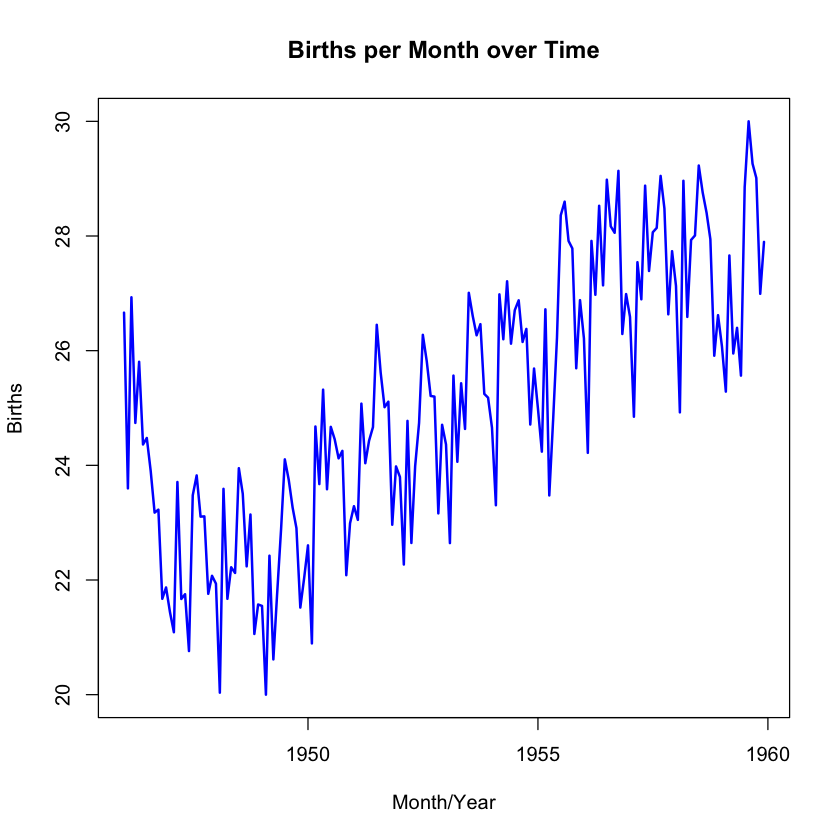

In [30]:
data <- read.csv("nyc_births.csv") 

data$date <- as.Date(data$date, "%Y-%m-%d")

head(data$date)

# Plot births per month against month/year
plot(data$date, data$births, type = "l", xlab = "Month/Year", ylab = "Births",
     main = "Births per Month over Time", col = "blue", lwd = 2)

#data_1946 <- subset(data, year == 1946)

#plot(data_1946$date, data_1946$births, type = "l", xlab = "Month", ylab = "Births",
#     main = "Births per Month in 1946", col = "blue", lwd = 2)

#data_1951 <- subset(data, year == 1951)

#plot(data_1951$date, data_1951$births, type = "l", xlab = "Month", ylab = "Births",
#     main = "Births per Month in 1951", col = "blue", lwd = 2)

We see a general upward trend of birthrates since the mid 1940s. However, birthrates declined during the early 1940s. This may be due to WWII.

**B.3(b) [10 points] Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for these data.**

It's essential to consider the temporal and non-identically distributed nature of this dataset. Birth rates may exhibit temporal patterns, and consecutive monthly observations may be correlated. The standard bootstrap assumes independence between observations, and this assumption is likely violated in time series data. Birth rates might change over time due to various factors like demographic shifts, public health policies, war, or economic conditions. If the distribution of birth rates is not stationary over the entire time period, it violates the assumption of identical distribution for bootstrap resampling. This is shown in the early 1940s with WWII.